In [1]:
import pandas as pd

df = pd.read_csv("yeobo.csv")

df["Í∞ïÏàòÏó¨Î∂Ä"] = df["ÏùºÍ∞ïÏàòÎüâ(mm)"].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

mean_cloud_with_rain = df.loc[df["Í∞ïÏàòÏó¨Î∂Ä"] == 1, "ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"].mean()
mean_cloud_without_rain = df.loc[df["Í∞ïÏàòÏó¨Î∂Ä"] == 0, "ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"].mean()

def fill_cloud(row):
    if pd.isna(row["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"]):
        return mean_cloud_with_rain if row["Í∞ïÏàòÏó¨Î∂Ä"] == 1 else mean_cloud_without_rain
    else:
        return row["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"]

df["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"] = df.apply(fill_cloud, axis=1)

df.to_csv("yeobo_processed.csv", index=False)


In [3]:
df = pd.read_csv("yeobo_processed.csv")
print(df['Í∞ïÏàòÏó¨Î∂Ä'])

0        1
1        0
2        0
3        0
4        1
        ..
14607    0
14608    1
14609    0
14610    0
14611    0
Name: Í∞ïÏàòÏó¨Î∂Ä, Length: 14612, dtype: int64


In [7]:
import pandas as pd

# 1. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("yeobo.csv")

# 2. ÎÇ†Ïßú ÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò Î∞è Ï†ïÎ†¨
df["ÏùºÏãú"] = pd.to_datetime(df["ÏùºÏãú"])
df = df.sort_values("ÏùºÏãú")
df.set_index("ÏùºÏãú", inplace=True)

# 3. Í∞ïÏàòÏó¨Î∂Ä ÏÉùÏÑ±
df["Í∞ïÏàòÏó¨Î∂Ä"] = df["ÏùºÍ∞ïÏàòÎüâ(mm)"].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# 4. ÌèâÍ∑† Ï†ÑÏö¥Îüâ Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
mean_cloud_with_rain = df.loc[df["Í∞ïÏàòÏó¨Î∂Ä"] == 1, "ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"].mean()
mean_cloud_without_rain = df.loc[df["Í∞ïÏàòÏó¨Î∂Ä"] == 0, "ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"].mean()

df["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"] = df.apply(
    lambda row: mean_cloud_with_rain if pd.isna(row["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"]) and row["Í∞ïÏàòÏó¨Î∂Ä"] == 1
    else mean_cloud_without_rain if pd.isna(row["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"]) else row["ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)"],
    axis=1
)

# 5. ÌíçÏÜç Î∞è ÏÉÅÎåÄÏäµÎèÑ Í≤∞Ï∏° Î≥¥ÏôÑ
# interpolate (ÏãúÍ∞Ñ Í∏∞Ï§Ä, limit=1)
for col in ["ÌèâÍ∑† ÌíçÏÜç(m/s)", "ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)"]:
    df[col] = df[col].interpolate(method="time", limit=1)

# ÌèâÍ∑† ÌíçÏÜç Î≥¥ÏôÑ (Ïõî/Ïùº Í∏∞Ï§Ä Í≥ºÍ±∞ ÌèâÍ∑†)
df["Ïõî"] = df.index.month
df["Ïùº"] = df.index.day

for col in ["ÌèâÍ∑† ÌíçÏÜç(m/s)"]:
    daily_avg = df.groupby(["Ïõî", "Ïùº"])[col].transform("mean")
    df[col] = df[col].fillna(daily_avg)

# ÏÉÅÎåÄÏäµÎèÑ Î≥¥ÏôÑ (Ï†ÑÏ≤¥ ÌèâÍ∑†Í∞í)
for col in ["ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)"]:
    df[col] = df[col].fillna(df[col].mean())

# 6. Ï†ïÎ¶¨ ÌõÑ Ï†ÄÏû•
df.drop(columns=["Ïõî", "Ïùº"], inplace=True)
df.reset_index(inplace=True)
df.to_csv("yeobo_processed.csv", index=False)


In [26]:
df = pd.read_csv("yeobo_processed.csv")
df.isna().sum()

ÏùºÏãú                      0
ÏßÄÏ†ê                      0
ÏßÄÏ†êÎ™Ö                     0
ÌèâÍ∑†Í∏∞Ïò®(¬∞C)                7
ÏùºÍ∞ïÏàòÎüâ(mm)             8034
ÌèâÍ∑† ÌíçÏÜç(m/s)              0
ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)            7
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)              0
ÌèâÍ∑† Ï¶ùÍ∏∞Ïïï(hPa)             7
ÌèâÍ∑† ÌòÑÏßÄÍ∏∞Ïïï(hPa)            8
ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)            8
Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)            29
Ìï©Í≥Ñ ÏùºÏÇ¨Îüâ(MJ/m2)        7038
Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)         14525
Ïùº ÏµúÏã¨Ï†ÅÏÑ§(cm)          14515
Ìï©Í≥Ñ 3ÏãúÍ∞Ñ Ïã†Ï†ÅÏÑ§(cm)      14525
ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)            0
ÌèâÍ∑† Ï§ëÌïòÏ∏µÏö¥Îüâ(1/10)       3855
ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)            29
ÌèâÍ∑† 5cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)     10973
ÌèâÍ∑† 10cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10974
ÌèâÍ∑† 20cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10980
ÌèâÍ∑† 30cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10964
Ìï©Í≥Ñ ÎåÄÌòïÏ¶ùÎ∞úÎüâ(mm)         7811
Ìï©Í≥Ñ ÏÜåÌòïÏ¶ùÎ∞úÎüâ(mm)         7586
9-9Í∞ïÏàò(mm)           11216
ÏïàÍ∞ú Í≥ÑÏÜçÏãúÍ∞Ñ(hr)         14385
Í∞ïÏàòÏ

In [38]:
df = pd.read_csv("yeobo.csv")
print(df.isna().sum())

ÏßÄÏ†ê                      0
ÏßÄÏ†êÎ™Ö                     0
ÏùºÏãú                      0
ÌèâÍ∑†Í∏∞Ïò®(¬∞C)                7
ÏùºÍ∞ïÏàòÎüâ(mm)             8034
ÌèâÍ∑† ÌíçÏÜç(m/s)             44
ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)            7
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)              6
ÌèâÍ∑† Ï¶ùÍ∏∞Ïïï(hPa)             7
ÌèâÍ∑† ÌòÑÏßÄÍ∏∞Ïïï(hPa)            8
ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)            8
Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)            29
Ìï©Í≥Ñ ÏùºÏÇ¨Îüâ(MJ/m2)        7038
Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)         14525
Ïùº ÏµúÏã¨Ï†ÅÏÑ§(cm)          14515
Ìï©Í≥Ñ 3ÏãúÍ∞Ñ Ïã†Ï†ÅÏÑ§(cm)      14525
ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)         3550
ÌèâÍ∑† Ï§ëÌïòÏ∏µÏö¥Îüâ(1/10)       3855
ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)            29
ÌèâÍ∑† 5cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)     10973
ÌèâÍ∑† 10cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10974
ÌèâÍ∑† 20cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10980
ÌèâÍ∑† 30cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10964
Ìï©Í≥Ñ ÎåÄÌòïÏ¶ùÎ∞úÎüâ(mm)         7811
Ìï©Í≥Ñ ÏÜåÌòïÏ¶ùÎ∞úÎüâ(mm)         7586
9-9Í∞ïÏàò(mm)           11216
ÏïàÍ∞ú Í≥ÑÏÜçÏãúÍ∞Ñ(hr)         14385
dtype: 

In [40]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # MICE Í∏∞Îä• ÌôúÏÑ±Ìôî
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Í≤∞Ï∏°Ïπò 0ÏúºÎ°ú Ï≤òÎ¶¨Ìï† Ïó¥
fill_zero_columns = ['ÏùºÍ∞ïÏàòÎüâ(mm)', 'Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)']
for col in fill_zero_columns:
    null_count = df[col].isnull().sum()
    df[col] = df[col].fillna(0)
    print(f"[{col}] Í≤∞Ï∏°Ïπò {null_count}Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.")


target_columns = [
    'ÌèâÍ∑†Í∏∞Ïò®(¬∞C)', 'ÌèâÍ∑† ÌíçÏÜç(m/s)','ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)','ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)','ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)', ']

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù (ÌäπÌûà ÎåÄÏÉÅ Ïó¥Îßå ÏÇ¨Ïö©)
imputed_data = imputer.fit_transform(df[target_columns])

# Í≤∞Í≥ºÎ•º ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Î∞òÏòÅ
df[target_columns] = imputed_data

# Ï†ÄÏû•
df.to_csv("weather_all_data_filled_mice.csv", index=False, encoding="utf-8-sig")
print("MICE Î∞©Ïãù(RandomForest Í∏∞Î∞ò)ÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ ÏôÑÎ£å Î∞è Ï†ÄÏû•Îê®")


[ÏùºÍ∞ïÏàòÎüâ(mm)] Í≤∞Ï∏°Ïπò 0Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.
[Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)] Í≤∞Ï∏°Ïπò 0Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.
MICE Î∞©Ïãù(RandomForest Í∏∞Î∞ò)ÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ ÏôÑÎ£å Î∞è Ï†ÄÏû•Îê®


C:\Users\MINJUN\Documents\GitHub\Data_Baisc_Analyze\Data_Baisc_Analyze\.venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [42]:
df = pd.read_csv("weather_all_data_filled.csv")
print(df.isna().sum())

ÏßÄÏ†ê                      0
ÏßÄÏ†êÎ™Ö                     0
ÏùºÏãú                      0
ÌèâÍ∑†Í∏∞Ïò®(¬∞C)                0
ÏùºÍ∞ïÏàòÎüâ(mm)                0
ÌèâÍ∑† ÌíçÏÜç(m/s)              0
ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)            7
ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)              0
ÌèâÍ∑† Ï¶ùÍ∏∞Ïïï(hPa)             7
ÌèâÍ∑† ÌòÑÏßÄÍ∏∞Ïïï(hPa)            8
ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)            8
Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)            29
Ìï©Í≥Ñ ÏùºÏÇ¨Îüâ(MJ/m2)        7038
Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)             0
Ïùº ÏµúÏã¨Ï†ÅÏÑ§(cm)          14515
Ìï©Í≥Ñ 3ÏãúÍ∞Ñ Ïã†Ï†ÅÏÑ§(cm)      14525
ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)            0
ÌèâÍ∑† Ï§ëÌïòÏ∏µÏö¥Îüâ(1/10)       3855
ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)             0
ÌèâÍ∑† 5cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)     10973
ÌèâÍ∑† 10cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10974
ÌèâÍ∑† 20cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10980
ÌèâÍ∑† 30cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)    10964
Ìï©Í≥Ñ ÎåÄÌòïÏ¶ùÎ∞úÎüâ(mm)         7811
Ìï©Í≥Ñ ÏÜåÌòïÏ¶ùÎ∞úÎüâ(mm)         7586
9-9Í∞ïÏàò(mm)           11216
ÏïàÍ∞ú Í≥ÑÏÜçÏãúÍ∞Ñ(hr)         14385
dtype: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = "./mice2.csv"
df = pd.read_csv(file_path)

fill_zero_columns = ['ÏùºÍ∞ïÏàòÎüâ(mm)', 'Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)']
for col in fill_zero_columns:
    if col in df.columns:
        null_count = df[col].isnull().sum()
        df[col] = df[col].fillna(0)
        print(f"[{col}] Í≤∞Ï∏°Ïπò {null_count}Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.")


target_columns = [
    'ÏµúÎåÄ ÏàúÍ∞Ñ ÌíçÏÜç ÌíçÌñ•(16Î∞©ÏúÑ)','ÏµúÎåÄ ÏàúÍ∞ÑÌíçÏÜç ÏãúÍ∞Å(hhmi)','ÏµúÎåÄ ÌíçÏÜç ÌíçÌñ•(16Î∞©ÏúÑ)','ÏµúÎåÄ ÌíçÏÜç ÏãúÍ∞Å(hhmi)','ÌíçÏ†ïÌï©(100m)','ÏµúÎã§ÌíçÌñ•(16Î∞©ÏúÑ)',
    'Í∞ÄÏ°∞ÏãúÍ∞Ñ(hr)','Ìï©Í≥Ñ ÏùºÏ°∞ÏãúÍ∞Ñ(hr)','1ÏãúÍ∞Ñ ÏµúÎã§ÏùºÏÇ¨ ÏãúÍ∞Å(hhmi)','1ÏãúÍ∞Ñ ÏµúÎã§ÏùºÏÇ¨Îüâ(MJ/m2)','Ìï©Í≥Ñ ÏùºÏÇ¨Îüâ(MJ/m2)','ÌèâÍ∑† Ï§ëÌïòÏ∏µÏö¥Îüâ(1/10)',
    'ÏµúÏ†Ä Ï¥àÏÉÅÏò®ÎèÑ(¬∞C)','ÌèâÍ∑† 5cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)','ÌèâÍ∑† 10cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)','ÌèâÍ∑† 20cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)','ÌèâÍ∑† 30cm ÏßÄÏ§ëÏò®ÎèÑ(¬∞C)'
]

# MICE Í∏∞Î∞ò ÎåÄÏ≤¥ ÏàòÌñâ
imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42
)

imputed_data = imputer.fit_transform(df[target_columns])
df[target_columns] = imputed_data

# ÌååÏùº Ï†ÄÏû•
output_path = "mice3.csv"
df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(df.isna().sum())

[ÏùºÍ∞ïÏàòÎüâ(mm)] Í≤∞Ï∏°Ïπò 0Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.
[Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)] Í≤∞Ï∏°Ïπò 0Í∞úÎ•º 0ÏúºÎ°ú Ï±ÑÏõÄ.


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# üìå 1. ÌååÏùº Î°úÎìú
# 'mice_data.csv' ÌååÏùºÏùÑ EUC-KR Ïù∏ÏΩîÎî©ÏúºÎ°ú ÏùΩÏñ¥Ïò¥
df = pd.read_csv("mice_data.csv", encoding="euc-kr")

# üìå 2. ÏòàÏ∏°ÏóêÏÑú Ï†úÏô∏Ìï† Ïª¨ÎüºÎì§ Ï†ïÏùò
excluded_cols = ['ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)', 'ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', 'ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)', 'ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)']

# üìå 3. ÎÇ†Ïßú Ï≤òÎ¶¨
# 'ÏùºÏãú' Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïú ÌõÑ, Ïó∞/Ïõî/Ïùº Ïª¨ÎüºÏùÑ Îî∞Î°ú ÏÉùÏÑ±
df['ÏùºÏãú'] = pd.to_datetime(df['ÏùºÏãú'])
df['Ïó∞'] = df['ÏùºÏãú'].dt.year
df['Ïõî'] = df['ÏùºÏãú'].dt.month
df['Ïùº'] = df['ÏùºÏãú'].dt.day

# üìå 4. ÏûÖÎ†• ÌîºÏ≤ò(feature) Ïª¨ÎüºÍ≥º ÏòàÏ∏° ÎåÄÏÉÅ(target) Ïª¨Îüº Ï†ïÏùò
# - ÏûÖÎ†•: Ïó∞, Ïõî, Ïùº
# - ÏòàÏ∏° ÎåÄÏÉÅ: Ï†úÏô∏ Ïª¨Îüº + ÎÇ†Ïßú + ÏßÄÏ†ê Í¥ÄÎ†® Ïª¨ÎüºÏùÑ Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Ïª¨Îüº
feature_cols = ['Ïó∞', 'Ïõî', 'Ïùº']
target_cols = [col for col in df.columns if col not in excluded_cols + ['ÏßÄÏ†ê', 'ÏßÄÏ†êÎ™Ö', 'ÏùºÏãú'] + feature_cols]

# üìå 5. 2026ÎÖÑ 1Ïõî 1ÏùºÎ∂ÄÌÑ∞ 12Ïõî 31ÏùºÍπåÏßÄ ÎÇ†Ïßú ÏÉùÏÑ±
# ÏòàÏ∏°ÏùÑ ÏúÑÌïú ÎØ∏Îûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31')
future_df = pd.DataFrame({
    'ÏùºÏãú': future_dates,
    'Ïó∞': future_dates.year,
    'Ïõî': future_dates.month,
    'Ïùº': future_dates.day
})

# üìå 6. ÏòàÏ∏° Í≤∞Í≥ºÎ•º Îã¥ÏùÑ ÎîïÏÖîÎÑàÎ¶¨ Ï¥àÍ∏∞Ìôî
# 'ÏùºÏãú' Ïª¨ÎüºÎ∂ÄÌÑ∞ ÎÑ£Ïñ¥ÎëêÍ≥†, Ïù¥ÌõÑ ÏòàÏ∏°Í∞íÏùÑ Ïª¨ÎüºÎ≥ÑÎ°ú Ï∂îÍ∞ÄÌï† ÏòàÏ†ï
results = {'ÏùºÏãú': future_dates}

# üìå 7. Í∞Å ÏòàÏ∏° ÎåÄÏÉÅ Ïª¨ÎüºÎßàÎã§ Î™®Îç∏ ÌïôÏäµ Î∞è 2026ÎÖÑ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
for col in target_cols:
    # Ìï¥Îãπ Ïª¨ÎüºÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùÄ Ï†úÍ±∞
    temp_df = df.dropna(subset=[col])
    
    # ÏûÖÎ†•Í∞í: Ïó∞/Ïõî/Ïùº, ÌÉÄÍπÉÍ∞í: Ìï¥Îãπ Ïª¨Îüº
    X = temp_df[feature_cols]
    y = temp_df[col]

    # Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # 2026ÎÖÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏòàÏ∏° ÏàòÌñâ
    y_pred = model.predict(future_df[feature_cols])
    
    # Í≤∞Í≥º ÎîïÏÖîÎÑàÎ¶¨Ïóê ÏòàÏ∏°Í∞í Ï∂îÍ∞Ä
    results[col] = y_pred

# üìå 8. ÏòàÏ∏° Í≤∞Í≥ºÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôòÌïú ÌõÑ CSVÎ°ú Ï†ÄÏû•
predicted_df = pd.DataFrame(results)
predicted_df.to_csv("predicted_2026.csv", index=False, encoding="utf-8-sig")


Temp_Df:         ÏßÄÏ†ê  ÏßÄÏ†êÎ™Ö         ÏùºÏãú  ÌèâÍ∑†Í∏∞Ïò®(¬∞C)  ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)  ÏµúÍ≥†Í∏∞Ïò®(¬∞C)  ÏùºÍ∞ïÏàòÎüâ(mm)  \
0      184   Ï†úÏ£º 2015-01-01       3.3       1.7       5.4       4.2   
1      184   Ï†úÏ£º 2015-01-02       6.1       3.9       8.5       0.0   
2      184   Ï†úÏ£º 2015-01-03       6.8       3.5       9.6       0.0   
3      184   Ï†úÏ£º 2015-01-04      11.5       7.7      15.0       0.0   
4      184   Ï†úÏ£º 2015-01-05      12.9       6.8      17.5       0.7   
...    ...  ...        ...       ...       ...       ...       ...   
14607  189  ÏÑúÍ∑ÄÌè¨ 2024-12-27       7.1       5.2      12.1       0.0   
14608  189  ÏÑúÍ∑ÄÌè¨ 2024-12-28       5.1       2.7       7.3       0.1   
14609  189  ÏÑúÍ∑ÄÌè¨ 2024-12-29       7.3       3.5      12.2       0.0   
14610  189  ÏÑúÍ∑ÄÌè¨ 2024-12-30      10.6       6.7      14.6       0.0   
14611  189  ÏÑúÍ∑ÄÌè¨ 2024-12-31       8.8       5.3      13.7       0.0   

       ÏµúÎåÄ ÏàúÍ∞Ñ ÌíçÏÜç(m/s)  ÏµúÎåÄ ÌíçÏÜç(m/s

[ÌèâÍ∑†Í∏∞Ïò®(¬∞C)] MSE: 12.79, R¬≤: 0.7857


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) mis

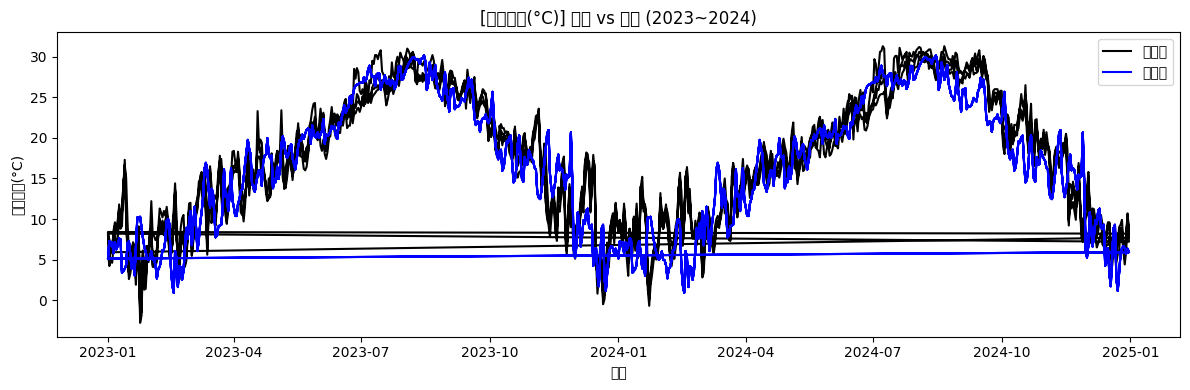

[ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)] MSE: 13.90, R¬≤: 0.7836


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing

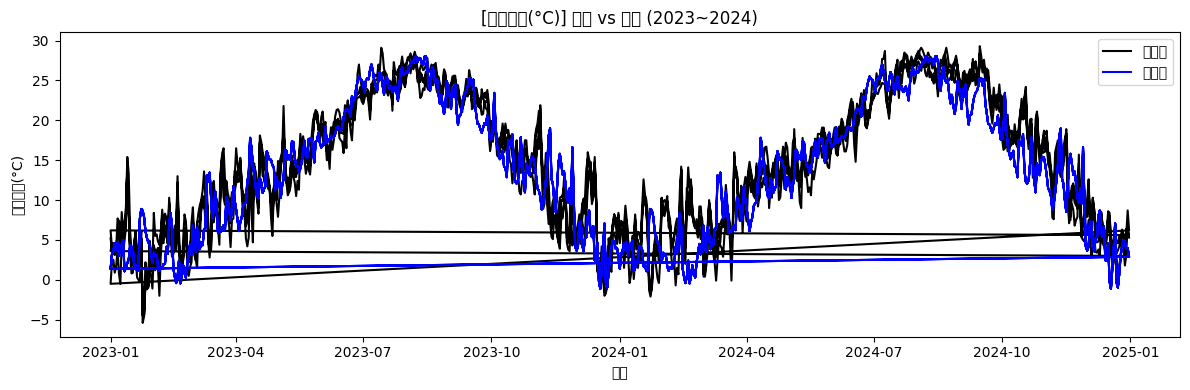

[ÏµúÍ≥†Í∏∞Ïò®(¬∞C)] MSE: 16.52, R¬≤: 0.7250


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing 

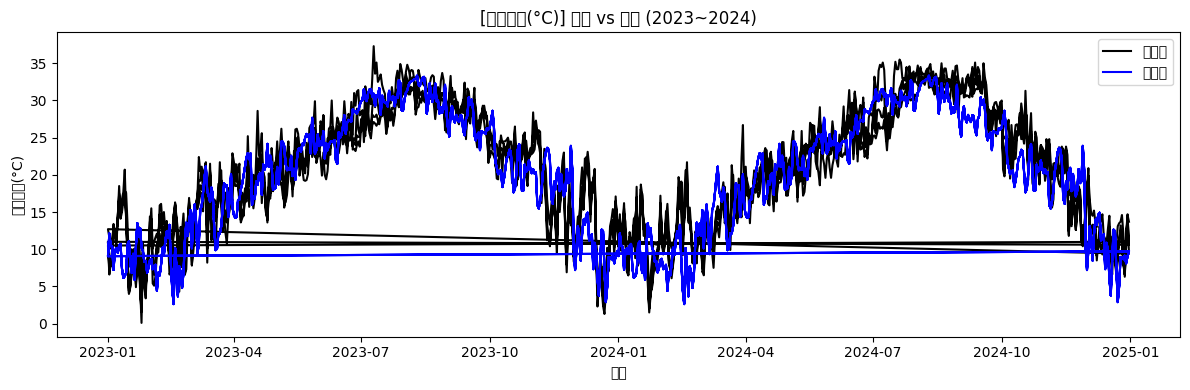

[ÏùºÍ∞ïÏàòÎüâ(mm)] MSE: 488.81, R¬≤: -0.6752


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) miss

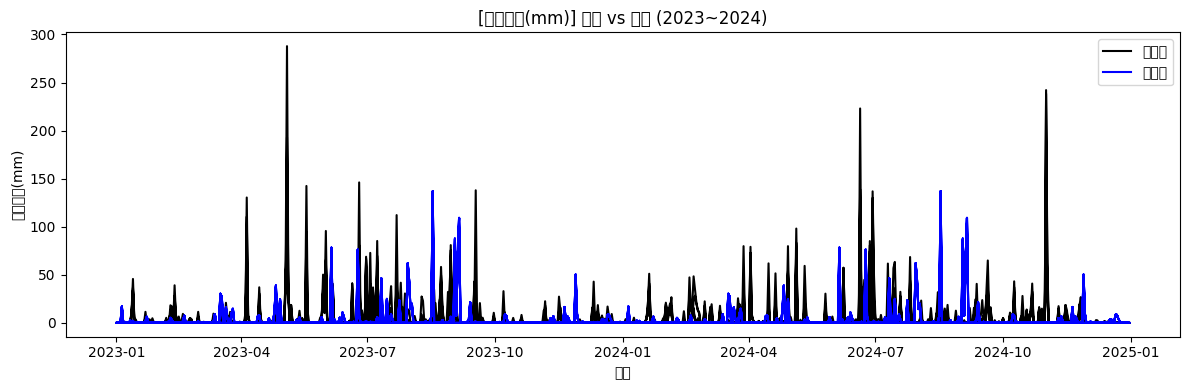

[ÏµúÎåÄ ÏàúÍ∞Ñ ÌíçÏÜç(m/s)] MSE: 32.27, R¬≤: -0.4125


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missi

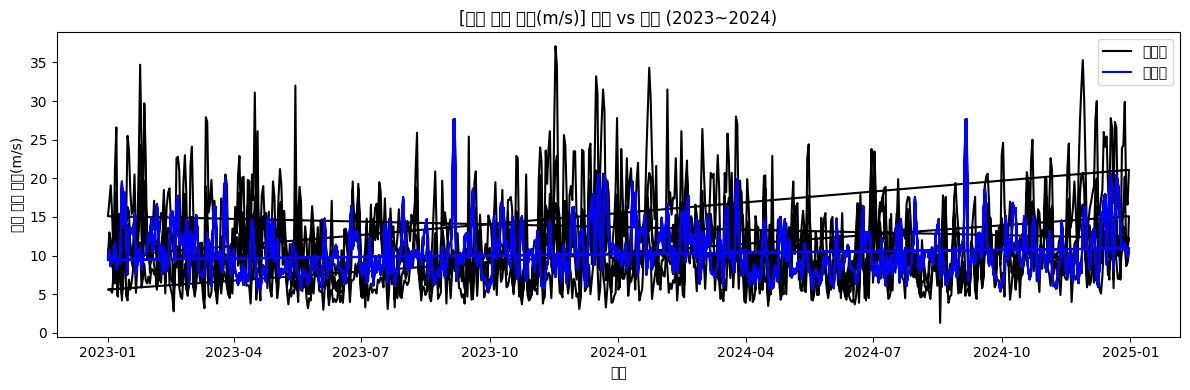

[ÏµúÎåÄ ÌíçÏÜç(m/s)] MSE: 17.76, R¬≤: -0.2695


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) miss

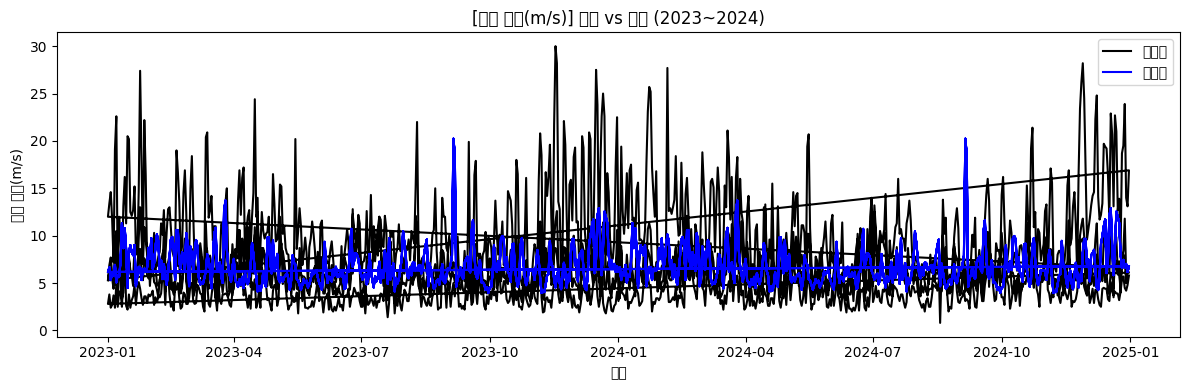

[ÌèâÍ∑† ÌíçÏÜç(m/s)] MSE: 7.72, R¬≤: -0.2100


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) 

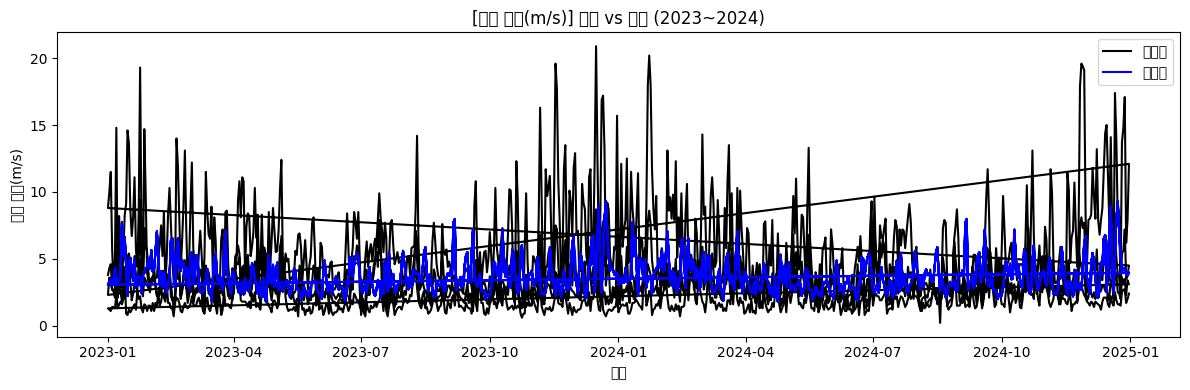

[ÏµúÏÜå ÏÉÅÎåÄÏäµÎèÑ(%)] MSE: 349.76, R¬≤: -0.2967


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missi

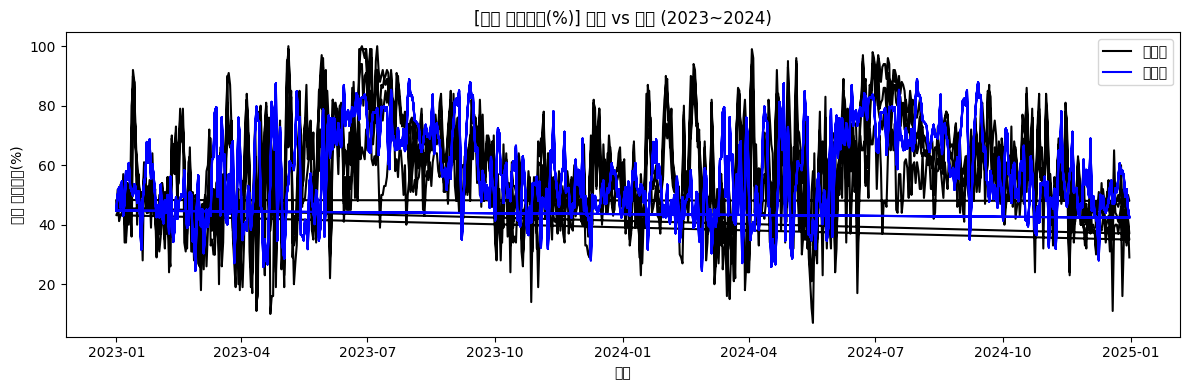

[ÌèâÍ∑† Ï¶ùÍ∏∞Ïïï(hPa)] MSE: 21.89, R¬≤: 0.7307


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) 

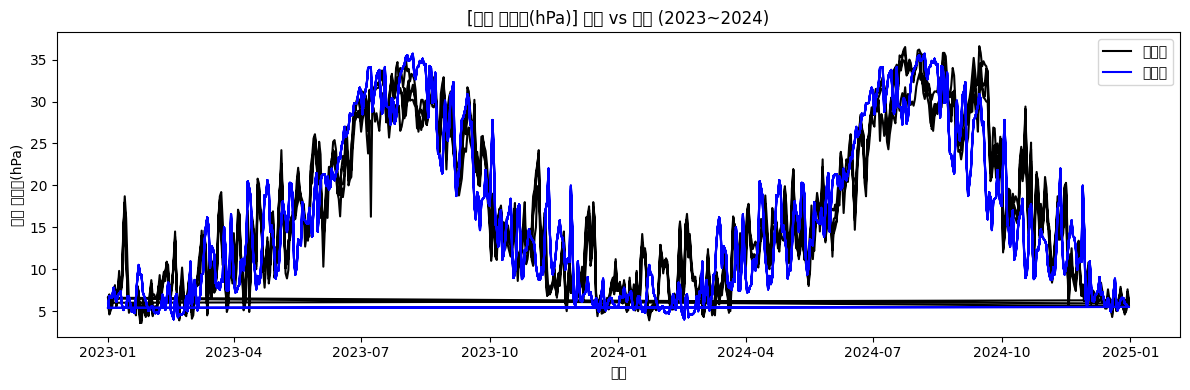

[ÌèâÍ∑† ÌòÑÏßÄÍ∏∞Ïïï(hPa)] MSE: 43.31, R¬≤: 0.2993


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) 

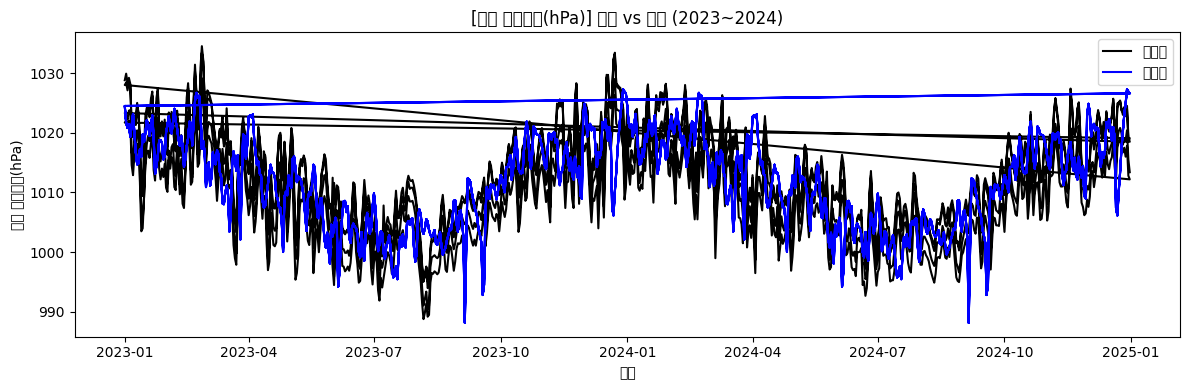

[ÏµúÏ†Ä Ìï¥Î©¥Í∏∞Ïïï(hPa)] MSE: 51.34, R¬≤: 0.0801


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) mis

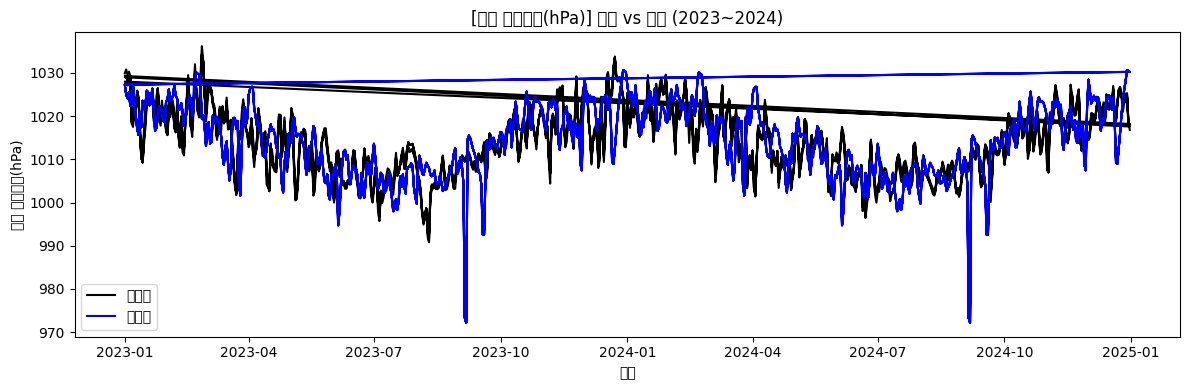

[Ïùº ÏµúÏã¨Ïã†Ï†ÅÏÑ§(cm)] MSE: 0.06, R¬≤: -0.1452


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missin

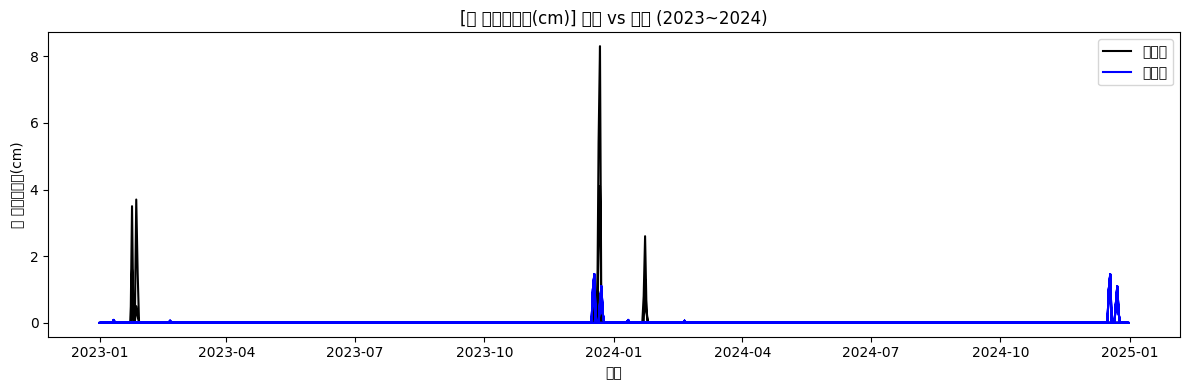

[ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)] MSE: 15.43, R¬≤: 0.8121


C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\MINJUN\AppData\Local\Temp\ipykernel_50500\3815442214.py:53: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) 

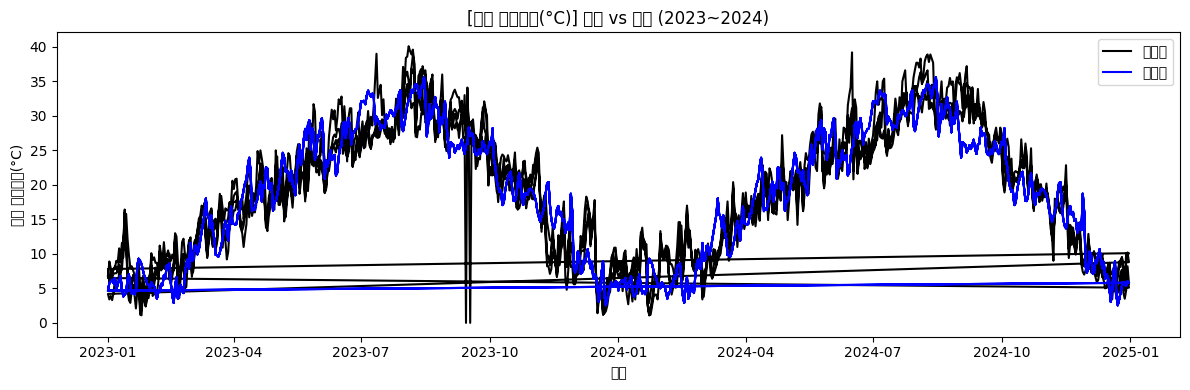

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("mice_data.csv", encoding="euc-kr")

excluded_cols = ['ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)', 'ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', 'ÌèâÍ∑† Ï†ÑÏö¥Îüâ(1/10)', 'ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)']
df['ÏùºÏãú'] = pd.to_datetime(df['ÏùºÏãú'])
df['Ïó∞'] = df['ÏùºÏãú'].dt.year
df['Ïõî'] = df['ÏùºÏãú'].dt.month
df['Ïùº'] = df['ÏùºÏãú'].dt.day

feature_cols = ['Ïó∞', 'Ïõî', 'Ïùº']
target_cols = [col for col in df.columns if col not in excluded_cols + ['ÏßÄÏ†ê', 'ÏßÄÏ†êÎ™Ö', 'ÏùºÏãú'] + feature_cols]

# 2. ÌïôÏäµÏö©(2015~2022) / ÌÖåÏä§Ìä∏Ïö©(2023~2024) Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
train_df = df[df['Ïó∞'] <= 2022]
test_df = df[df['Ïó∞'].isin([2023, 2024])]

# 3. Ïª¨ÎüºÎ≥Ñ ÏÑ±Îä• ÌèâÍ∞Ä Î∞è ÏãúÍ∞ÅÌôî
for col in target_cols:
    # Í≤∞Ï∏°Ïπò Ï†úÍ±∞
    train_temp = train_df.dropna(subset=[col])
    test_temp = test_df.dropna(subset=[col])

    # ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
    X_train = train_temp[feature_cols]
    y_train = train_temp[col]
    X_test = test_temp[feature_cols]
    y_test = test_temp[col]

    # Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏°
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Ï†ïÌôïÎèÑ ÏßÄÌëú Í≥ÑÏÇ∞
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"[{col}] MSE: {mse:.2f}, R¬≤: {r2:.4f}")

    # ÏòàÏ∏° vs Ïã§Ï†ú ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(12, 4))
    plt.plot(test_temp['ÏùºÏãú'], y_test, label='Ïã§Ï†úÍ∞í', color='black')
    plt.plot(test_temp['ÏùºÏãú'], y_pred, label='ÏòàÏ∏°Í∞í', color='blue')
    plt.title(f"[{col}] ÏòàÏ∏° vs Ïã§Ï†ú (2023~2024)")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_csv("weather_all_data_cleaned.csv", encoding='euc-kr')  # ÎòêÎäî 'utf-8'Î°ú ÏãúÎèÑ

# 2. Ï†úÏô∏Ìï† Ïª¨Îüº Ï†ïÏùò
excluded_cols = ['ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)', 'ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', 'ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)',]

# 3. ÎÇ†Ïßú Ïª¨Îüº Ï≤òÎ¶¨
df['ÏùºÏãú'] = pd.to_datetime(df['ÏùºÏãú'])
df['Ïó∞'] = df['ÏùºÏãú'].dt.year
df['Ïõî'] = df['ÏùºÏãú'].dt.month
df['Ïùº'] = df['ÏùºÏãú'].dt.day

# 4. ÏòàÏ∏° ÎåÄÏÉÅ Ïª¨Îüº Ï†ïÏùò
feature_cols = ['Ïó∞', 'Ïõî', 'Ïùº']
target_cols = [col for col in df.columns if col not in excluded_cols + ['ÏßÄÏ†ê', 'ÏßÄÏ†êÎ™Ö', 'ÏùºÏãú'] + feature_cols]

# 5. 2026ÎÖÑ ÏòàÏ∏°Ïö© ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
future_dates = pd.date_range(start='2026-01-01', end='2026-12-31')
future_df = pd.DataFrame({
    'ÏùºÏãú': future_dates,
    'Ïó∞': future_dates.year,
    'Ïõî': future_dates.month,
    'Ïùº': future_dates.day
})

# 6. ÏßÄÏ†êÎ≥Ñ ÏòàÏ∏° Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
results_by_station = {}

# 7. ÏßÄÏ†êÎ≥ÑÎ°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏòàÏ∏° ÏàòÌñâ
for station, group in df.groupby('ÏßÄÏ†êÎ™Ö'):
    results = {'ÏùºÏãú': future_dates}
    
    for col in target_cols:
        temp_df = group.dropna(subset=[col])
        X = temp_df[feature_cols]
        y = temp_df[col]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        y_pred = model.predict(future_df[feature_cols])
        results[col] = y_pred

    predicted_df = pd.DataFrame(results)
    predicted_df['ÏßÄÏ†êÎ™Ö'] = station
    results_by_station[station] = predicted_df

# 8. ÏßÄÏ†êÎ≥Ñ Í≤∞Í≥º Î≥ëÌï©
combined_df = pd.concat(results_by_station.values(), ignore_index=True)

# 9. CSVÎ°ú Ï†ÄÏû•
combined_df.to_csv("2026_ÏòàÏ∏°.csv", index=False, encoding="utf-8-sig")
print(combined_df)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# üìå Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è ÎÇ†Ïßú Î∂ÑÌï¥
df = pd.read_csv("weather_all_data_cleaned.csv", encoding='euc-kr')
df['ÏùºÏãú'] = pd.to_datetime(df['ÏùºÏãú'])
df['Ïó∞'] = df['ÏùºÏãú'].dt.year
df['Ïõî'] = df['ÏùºÏãú'].dt.month
df['Ïùº'] = df['ÏùºÏãú'].dt.day

# üìå ÏßÄÏ†ê Î∞è ÏòàÏ∏° Ïó∞ÎèÑ ÏßÄÏ†ï
station_name = 'ÏÑúÏö∏'
target_year = 2023

# üìå Ï†úÏô∏ Ïª¨Îüº Ï†ïÏùò
excluded_cols = ['ÌèâÍ∑† ÏÉÅÎåÄÏäµÎèÑ(%)', 'ÌèâÍ∑† Ïù¥Ïä¨Ï†êÏò®ÎèÑ(¬∞C)', 'ÌèâÍ∑† Ìï¥Î©¥Í∏∞Ïïï(hPa)', 'ÏßÄÏ†ê', 'ÏßÄÏ†êÎ™Ö', 'ÏùºÏãú', 'Ïó∞', 'Ïõî', 'Ïùº']
target_cols = [col for col in df.columns if col not in excluded_cols]

# üìå Ìï¥Îãπ ÏßÄÏ†ê ÌïÑÌÑ∞ÎßÅ
df_station = df[df['ÏßÄÏ†êÎ™Ö'] == station_name]

# üìå ÌïôÏäµÏö©, ÌÖåÏä§Ìä∏Ïö© Î∂ÑÎ¶¨
train_df = df_station[df_station['Ïó∞'] != target_year]
test_df = df_station[df_station['Ïó∞'] == target_year]

# üìå Î∞òÎ≥µÌïòÏó¨ ÏòàÏ∏° Î∞è Í∑∏ÎûòÌîÑ Ï∂úÎ†•
for target_col in target_cols:
    train_temp = train_df.dropna(subset=[target_col])
    test_temp = test_df.dropna(subset=[target_col])

    if len(test_temp) == 0:  # ÏòàÏ∏°Ìï† Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ Ïä§ÌÇµ
        continue

    X_train = train_temp[['Ïó∞', 'Ïõî', 'Ïùº']]
    y_train = train_temp[target_col]

    X_test = test_temp[['Ïó∞', 'Ïõî', 'Ïùº']]
    y_test = test_temp[target_col]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # üìä Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.figure(figsize=(14, 5))
    plt.plot(test_temp['ÏùºÏãú'], y_test.values, label='Ïã§Ï†úÍ∞í', linewidth=2)
    plt.plot(test_temp['ÏùºÏãú'], y_pred, label='ÏòàÏ∏°Í∞í', linewidth=2, linestyle='--')
    plt.title(f"{station_name} - {target_year}ÎÖÑ [{target_col}] Ïã§Ï†ú vs ÏòàÏ∏°")
    plt.xlabel("ÎÇ†Ïßú")
    plt.ylabel(target_col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import os

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
predict_df = pd.read_csv("./2026_ÏòàÏ∏°.csv")
train_df = pd.read_csv("./data_for_predict.csv", encoding="euc-kr")

# ÎÇ†Ïßú Î≥ÄÌôò
predict_df['ÏùºÏãú'] = pd.to_datetime(predict_df['ÏùºÏãú'])
train_df['ÏùºÏãú'] = pd.to_datetime(train_df['ÏùºÏãú'])

# ÎπÑÍµêÌï† ÏßÄÏ†êÎ™ÖÍ≥º ÎπÑÍµê Ïó∞ÎèÑ
station = 'Í≥†ÏÇ∞'
compare_year = 2023

# train Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ìï¥Îãπ ÏßÄÏ†ê & Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ
real_df = train_df[(train_df['ÏßÄÏ†êÎ™Ö'] == station) & (train_df['ÏùºÏãú'].dt.year == compare_year)]

# ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎèôÏùº ÏßÄÏ†êÎßå Ï∂îÏ∂ú
pred_df = predict_df[predict_df['ÏßÄÏ†êÎ™Ö'] == station]

# ÎÇ†Ïßú Í∏∞Ï§Ä Î≥ëÌï© (ÎÇ¥Ïùº ÏòàÏ∏° Îì±ÏùÄ ÏãúÍ∞Ñ ÏãúÌîÑÌä∏ ÌïÑÏöîÌïòÏßÄÎßå ÌòÑÏû¨Îäî Í∞ôÏùÄ ÏùºÏûê ÎπÑÍµê)
merged = pd.merge(real_df, pred_df, on='ÏùºÏãú', suffixes=('_Ïã§Ï†ú', '_ÏòàÏ∏°'))

# ÎπÑÍµê Í∞ÄÎä•Ìïú Í≥µÌÜµ Ïª¨Îüº
common_cols = ['ÌèâÍ∑†Í∏∞Ïò®(¬∞C)', 'ÏµúÏ†ÄÍ∏∞Ïò®(¬∞C)', 'ÏµúÍ≥†Í∏∞Ïò®(¬∞C)', 
               'ÏµúÎåÄ ÏàúÍ∞Ñ ÌíçÏÜç(m/s)', 'ÏµúÎåÄ ÌíçÏÜç(m/s)', 'ÌèâÍ∑† ÌíçÏÜç(m/s)',
               'ÌèâÍ∑† Ï¶ùÍ∏∞Ïïï(hPa)', 'ÌèâÍ∑† ÌòÑÏßÄÍ∏∞Ïïï(hPa)', 'ÌèâÍ∑† ÏßÄÎ©¥Ïò®ÎèÑ(¬∞C)']

# Í≤∞Í≥º Ï†ÄÏû• Ìè¥Îçî
os.makedirs("scatter_results", exist_ok=True)

# ÏÇ∞Ï†êÎèÑ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for col in common_cols:
    col_real = col + '_Ïã§Ï†ú'
    col_pred = col + '_ÏòàÏ∏°'

    if col_real not in merged.columns or col_pred not in merged.columns:
        continue

    y_true = merged[col_real]
    y_pred = merged[col_pred]

    # ÏÑ±Îä•ÏßÄÌëú
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='ÏôÑÎ≤Ω ÏòàÏ∏°ÏÑ† (y = x)')
    plt.xlabel(f"{col} Ïã§Ï†úÍ∞í")
    plt.ylabel(f"{col} ÏòàÏ∏°Í∞í")
    plt.title(f"[{station}] {col} Ïã§Ï†ú vs ÏòàÏ∏°\nMAE={mae:.2f}, RMSE={rmse:.2f}, R¬≤={r2:.3f}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"scatter_results/{station}_{col}_scatter.png")
    plt.close()


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.